# KNN

#### Importando bibliotecas

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import   accuracy_score 
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [2]:
def report_teste(predictions, alg_name):

    print('Resultados para o classificador {0}:'.format(alg_name))
    print(classification_report(y_teste, predictions), 
    print ("Acurácia para o treino é ", accuracy_score(y_teste,predictions)))
    
def report_treino(predictions, alg_name):

    print('Resultados para o classificador {0}:'.format(alg_name))
    print(classification_report(y_treino, predictions), 
    print ("Acurácia para o treino é ", accuracy_score(y_treino,predictions)))

#### Dados

In [3]:
dataset = pd.read_csv('C:\\Users\\Fabiel Fernando\\Desktop\\PROVA\\classificacao_Q4.csv')

In [4]:
#Verificando a existência de missings
#dataset.apply(lambda x: x.isnull().sum())

In [5]:
dataset.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,target
0,1.696199,-0.792598,-0.349427,-0.464560,3.187014,0.035976,1.033274,-1.504968,0.204693,1.691204,-0.148668,-4.074097,-0.032896,-0.663494,-0.386016,-0.237805,-1.510523,-1.570864,-0.368605,0.812503,0.549905,-0.730260,0.761423,1.128273,-1.763750,0.579692,-0.293674,0.295500,-0.427231,-0.295434,-2.626552,-0.888908,0.360110,-3.085644,-0.945316,-0.904486,1.072223,1.778115,-0.148051,0.634574,0.209628,0.561244,-0.586968,-3.702351,-0.649087,0.066648,0.521637,-0.318873,-0.964632,-0.068293,-1.941717,0.011300,-0.030974,1.666534,1.907174,0.454065,0.157899,-1.415378,-0.220428,-1.163591,0.643701,-0.593975,-0.230020,2.142668,-1.150896,1.980677,1.115755,0.511176,-0.526043,-0.492225,1.291322,-0.795223,1.292448,0.804562,0.822480,-1.205006,-0.280887,-1.364098,0.312000,-1.925461,0.498012,0.371394,0.176175,0.547430,1.058247,0.503351,1.018997,0.221213,-0.419000,-0.858737,-0.534360,1.488142,-0.686337,2.084970,-0.685140,-2.049451,2.015426,1.158477,-0.309441,-1.549833,4.0
1,-0.236696,-2.202342,0.024023,1.497700,-0.069758,-2.467088,1.126529,-0.570557,2.079251,-1.882632,-0.827576,1.005103,-0.137394,1.189628,-0.851586,-1.288871,-0.963559,1.227582,0.715197,0.520097,0.588903,-0.590111,-2.210356,1.022461,-1.039452,-0.241972,0.282824,0.001147,-1.621286,-1.815760,0.663234,-0.208910,0.113045,2.046566,0.761385,1.412045,2.094611,-0.286475,0.718189,-0.421027,1.182153,0.379603,-0.835262,0.937721,0.114378,-0.651730,-0.047160,3.589095,-0.486826,2.847869,0.162564,-0.039426,0.462479,-1.531158,-1.860289,0.455750,2.220489,1.212844,-1.329690,-1.452428,0.053086,-0.574263,-2.518650,-1.737640,-0.194589,0.648973,-0.342163,-0.508209,0.947281,-0.430554,0.661217,-1.936414,-1.698198,-3.313671,-0.183713,-0.549041,1.280620,2.177973,0.706155,-1.002186,-0.760492,0.390230,1.652978,-0.281058,-2.274763,-1.451749,-0.594344,1.292452,1.066120,0.036062,0.498207,0.405567,0.509564,1.374071,-0.016943,-0.429280,-0.895016,1.259566,-0.354139,0.806797,5.0
2,-0.436683,1.563816,-0.895999,-0.580425,0.311060,-0.187369,0.805249,-2.399522,-0.578818,1.586981,-1.941955,-0.596377,-0.489321,-1.030148,-0.485569,0.902347,0.107147,-0.780838,0.402332,-1.450170,-0.583627,-0.706544,-0.025883,-1.450107,2.118729,1.015845,0.166787,-0.044010,-0.360155,0.101155,-0.799201,-1.102617,2.115397,-2.361777,0.525674,-1.911165,0.123961,-0.417771,0.548105,-0.217684,-0.431924,-0.442644,-1.489144,-1.000744,0.862522,-0.563455,0.588636,0.010576,-0.456408,-1.428348,0.216525,1.290350,-1.092070,0.522418,2.553921,0.087687,1.755408,-1.382265,0.032006,0.680842,0.911192,0.505370,-0.741637,0.980315,2.359120,-0.380329,0.234811,2.287361,-0.568738,-1.932310,-1.912456,-1.829811,-0.589138,0.473086,-0.237060,-0.106093,-0.690060,-0.640960,-1.088658,-0.998397,-1.579437,-0.697638,-0.620487,-0.320028,1.390414,0.449638,0.300941,-0.512526,0.656667,0.265771,-2.630024,0.933578,-1.285978,0.503162,0.204829,-0.753835,0.290033,1.721487,1.304518,0.478903,3.0
3,1.425908,0.400055,-0.305038,-0.930251,-2.214549,1.763379,-0.239868,-2.058891,-1.006533,-2.156839,-0.817310,3.135035,-1.046031,2.035231,0.307369,-0.831289,-0.263652,-1.479070,-0.675276,-0.222479,-0.441100,0.343649,0.210042,-2.030159,0.636847,-2.268783,1.066813,1.486655,0.665269,1.207031,3.549965,-0.026904,1.027441,1.979429,1.133188,1.709450,1.046510,1.397032,0.177327,-0.402179,-0.054244,-0.578126,-0.055127,2.794188,0.528181,-0.140851,-0.320488,-0.552952,-2.406692,0.054562,0.886823,-0.419061,-0.272393,-2.141239,-0.114749,0.230638,-0.250862,1.116209,1.452902,0.927677,-0.136729,-0.873607,0.430335,0.828970,0.313719,0.378332,-0.586515,-1.448876,-0.149765,-0.958114,-1.478115,-2.388252,-1.569214,-2.755844,-1.098166,1.4504

In [6]:
print("Dimensão dos nossos dados:\n", 
     dataset.shape)
#print("Tipo de variáveis:\n",
#     dataset.dtypes)

Dimensão dos nossos dados:
 (1500, 101)


#### Pocentagem da variável resposta

In [7]:
resposta = dataset['target']
count = pd.DataFrame(resposta.value_counts())
percent = pd.DataFrame(resposta.value_counts(normalize = True)*100)
table = pd.concat([count, percent], axis = 1)
table.columns = ['# target', '% target']
table

,# target,% target
2.0,153,10.200000
8.0,153,10.200000
3.0,152,10.133333
0.0,150,10.000000
4.0,150,10.000000
1.0,149,9.933333
6.0,149,9.933333
9.0,149,9.933333
5.0,148,9.866667
7.0,147,9.800000


In [8]:
#Descritiva de algumas variáveis
#dataset.describe()

#### Treino e Teste

In [9]:
feature_space = dataset.iloc[:, dataset.columns != 'target']
feature_class = dataset.iloc[:, dataset.columns == 'target']


X_treino, X_teste, y_treino, y_teste = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 42)

In [10]:
# Limpar conjuntos de teste para evitar futuras mensagens de aviso
y_treino = y_treino.values.ravel() 
y_teste = y_teste.values.ravel() 

## Ajustando KNN

In [11]:
classifier = KNeighborsClassifier(n_neighbors=5,
                                  weights='uniform',
                                  algorithm='auto',
                                  leaf_size=30,
                                  p=2,
                                  metric='minkowski',
                                  metric_params=None,
                                  n_jobs=1)
classifier.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Precisão do classificador

In [12]:
pred_test = classifier.predict(X_teste)
pred_train = classifier.predict(X_treino)

#### Tabela com cálculo de vária métricas conjunto treino

In [13]:
report_treino(pred_train,'KNN')

Resultados para o classificador KNN:
Acurácia para o treino é  0.7285714285714285
             precision    recall  f1-score   support

        0.0       0.71      0.74      0.72       103
        1.0       0.64      0.82      0.72        98
        2.0       0.69      0.64      0.66       111
        3.0       0.89      0.79      0.84       105
        4.0       0.77      0.74      0.75       104
        5.0       0.67      0.55      0.60        97
        6.0       0.65      0.64      0.65        98
        7.0       0.76      0.73      0.75       111
        8.0       0.84      0.76      0.80       106
        9.0       0.70      0.85      0.77       117

avg / total       0.73      0.73      0.73      1050
 None


#### Tabela com cálculo de vária métricas conjunto teste

In [14]:
report_teste(pred_test,'KNN')

Resultados para o classificador KNN:
Acurácia para o treino é  0.5977777777777777
             precision    recall  f1-score   support

        0.0       0.63      0.62      0.62        47
        1.0       0.58      0.69      0.63        51
        2.0       0.41      0.50      0.45        42
        3.0       0.75      0.57      0.65        47
        4.0       0.72      0.61      0.66        46
        5.0       0.63      0.53      0.57        51
        6.0       0.60      0.49      0.54        51
        7.0       0.56      0.56      0.56        36
        8.0       0.70      0.66      0.68        47
        9.0       0.49      0.81      0.61        32

avg / total       0.61      0.60      0.60       450
 None


## Ajustando o classificador com Grid Search

In [15]:
fit_knn = KNeighborsClassifier()

In [16]:
np.random.seed(42)
cv_kfold = KFold(10, shuffle = False)

param_grid = {"n_neighbors": range(1, 50),
                 "weights": ["uniform", "distance"],
                 "metric": ["euclidean", "manhattan"]} #"chebyshev", "minkowski"

In [17]:
cv_knn = GridSearchCV(fit_knn,
                     cv = cv_kfold,
                     param_grid = param_grid, 
                     n_jobs = 3)

In [18]:
cv_knn.fit(X_treino, y_treino)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
cv_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [20]:
fit_knn.set_params(n_neighbors = 7,
                      metric = 'manhattan',
                      weights = 'distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

In [21]:
fit_knn.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='distance')

#### Resultados Conjunto Treino

In [22]:
pred_train2 = fit_knn.predict(X_treino)
report_treino(pred_train2, 'KNN com Grid Search')

Resultados para o classificador KNN com Grid Search:
Acurácia para o treino é  1.0
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       103
        1.0       1.00      1.00      1.00        98
        2.0       1.00      1.00      1.00       111
        3.0       1.00      1.00      1.00       105
        4.0       1.00      1.00      1.00       104
        5.0       1.00      1.00      1.00        97
        6.0       1.00      1.00      1.00        98
        7.0       1.00      1.00      1.00       111
        8.0       1.00      1.00      1.00       106
        9.0       1.00      1.00      1.00       117

avg / total       1.00      1.00      1.00      1050
 None


#### Resultados conjunto teste

In [23]:
predictions_fit_knn = fit_knn.predict(X_teste)
report_teste(predictions_fit_knn, 'KNN com Grid Search')

Resultados para o classificador KNN com Grid Search:
Acurácia para o treino é  0.6533333333333333
             precision    recall  f1-score   support

        0.0       0.79      0.64      0.71        47
        1.0       0.62      0.63      0.62        51
        2.0       0.52      0.52      0.52        42
        3.0       0.79      0.66      0.72        47
        4.0       0.68      0.61      0.64        46
        5.0       0.70      0.61      0.65        51
        6.0       0.71      0.59      0.65        51
        7.0       0.60      0.75      0.67        36
        8.0       0.67      0.79      0.73        47
        9.0       0.50      0.81      0.62        32

avg / total       0.67      0.65      0.65       450
 None


In [24]:
predictions_knn = fit_knn.predict(X_teste)

In [26]:
print(confusion_matrix(y_teste, predictions_knn))

[[30  0  2  0  0  4  1  3  5  2]
 [ 0 32  4  0  7  0  1  0  0  7]
 [ 1  1 22  2  0  4  4  5  0  3]
 [ 0  7  3 31  3  0  0  1  0  2]
 [ 0  5  1  2 28  0  0  1  0  9]
 [ 3  6  3  1  0 31  1  2  2  2]
 [ 0  0  6  0  3  3 30  3  6  0]
 [ 2  0  0  0  0  1  1 27  5  0]
 [ 1  0  1  1  0  0  4  2 37  1]
 [ 1  1  0  2  0  1  0  1  0 26]]


In [27]:
accuracy_knn = fit_knn.score(X_teste, y_teste)

print("Aqui está a nossa precisão média no conjunto de testes: {0:.3f}".format(accuracy_knn))

Aqui está a nossa precisão média no conjunto de testes: 0.653


In [28]:
test_error_rate_knn = 1 - accuracy_knn
print("A taxa de erro de teste para o nosso modelo é: {0: .3f}" .format(test_error_rate_knn))

A taxa de erro de teste para o nosso modelo é:  0.347


### Curva ROC

In [29]:
predictions_prob = fit_knn.predict_proba(X_teste)[:, 1]

fpr2, tpr2, _ = roc_curve(y_teste,
                          predictions_prob,
                          pos_label = 1)

In [30]:
auc_knn = auc(fpr2, tpr2)

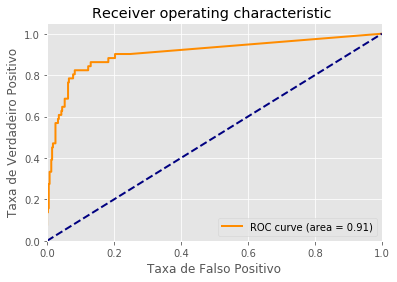

In [31]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

In [32]:
    report_teste(predictions_knn, 'KNN')

Resultados para o classificador KNN:
Acurácia para o treino é  0.6533333333333333
             precision    recall  f1-score   support

        0.0       0.79      0.64      0.71        47
        1.0       0.62      0.63      0.62        51
        2.0       0.52      0.52      0.52        42
        3.0       0.79      0.66      0.72        47
        4.0       0.68      0.61      0.64        46
        5.0       0.70      0.61      0.65        51
        6.0       0.71      0.59      0.65        51
        7.0       0.60      0.75      0.67        36
        8.0       0.67      0.79      0.73        47
        9.0       0.50      0.81      0.62        32

avg / total       0.67      0.65      0.65       450
 None


## Validação Cruzada

### K - fold

In [33]:
X = dataset.iloc[:, 0:100].values
y = dataset['target'].astype('category')

In [34]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=42)
model = KNeighborsClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
results.mean(), results.std()

(0.6113333333333333, 0.03026549190084312)

### LOOCV

In [35]:
model = KNeighborsClassifier()
accuracies = cross_val_score(model, X=X, y=y, cv=LeaveOneOut())
accuracies.mean()

0.6113333333333333

### Repeat CV

In [36]:
from sklearn.model_selection import RepeatedKFold
cv_repeat = RepeatedKFold(n_splits=6, n_repeats=3, random_state=42)
model = KNeighborsClassifier()
accuracies = cross_val_score(model, X=X, y=y, cv=cv_repeat)
accuracies.mean()

0.6102222222222221

### Separando as k primeiras observações para treino e o restante para teste

In [37]:
X_treino = dataset.iloc[0:499, 0:99].values
y_treino = dataset.iloc[0:499, 100].values


X_teste = dataset.iloc[500:1500, 0:99].values
y_teste = dataset.iloc[500:1500, 100].values

In [38]:
clf = KNeighborsClassifier(n_neighbors=5,
                                  weights='uniform',
                                  algorithm='auto',
                                  leaf_size=30,
                                  p=2,
                                  metric='minkowski',
                                  metric_params=None,
                                  n_jobs=1)
clf.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Precisão do classificador no Decision Tree

In [39]:
pred_teste = clf.predict(X_teste)
pred_treino = clf.predict(X_treino)

#### Métricas Treino

In [40]:
 report_treino(pred_treino, 'KNN')

Resultados para o classificador KNN:
Acurácia para o treino é  0.751503006012024
             precision    recall  f1-score   support

        0.0       0.73      0.80      0.77        55
        1.0       0.62      0.85      0.72        48
        2.0       0.61      0.56      0.58        45
        3.0       0.87      0.78      0.82        58
        4.0       0.81      0.71      0.76        48
        5.0       0.88      0.63      0.73        46
        6.0       0.67      0.64      0.65        47
        7.0       0.81      0.69      0.74        51
        8.0       0.86      0.88      0.87        41
        9.0       0.75      0.93      0.83        60

avg / total       0.76      0.75      0.75       499
 None


#### Métricas Teste

In [41]:
report_teste(pred_teste, 'KNN')

Resultados para o classificador KNN:
Acurácia para o treino é  0.562
             precision    recall  f1-score   support

        0.0       0.49      0.77      0.60        95
        1.0       0.46      0.58      0.52       101
        2.0       0.51      0.49      0.50       108
        3.0       0.72      0.45      0.55        94
        4.0       0.63      0.52      0.57       102
        5.0       0.68      0.37      0.48       102
        6.0       0.49      0.46      0.48       102
        7.0       0.60      0.53      0.56        96
        8.0       0.76      0.60      0.67       111
        9.0       0.52      0.89      0.66        89

avg / total       0.59      0.56      0.56      1000
 None
